In [1]:
#IMPORT LIBRARIES FOR PROJECT


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
 #Load the training set features and labels
train_features = pd.read_csv('training_set_features.csv')
train_labels = pd.read_csv('training_set_labels.csv')

# Display the first few rows of the training set features and labels
train_features_head = train_features.head()
train_labels_head = train_labels.head()

train_features_head, train_labels_head

(   respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
 0              0           1.0             0.0                        0.0   
 1              1           3.0             2.0                        0.0   
 2              2           1.0             1.0                        0.0   
 3              3           1.0             1.0                        0.0   
 4              4           2.0             1.0                        0.0   
 
    behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
 0                   0.0                   0.0                    0.0   
 1                   1.0                   0.0                    1.0   
 2                   1.0                   0.0                    0.0   
 3                   1.0                   0.0                    1.0   
 4                   1.0                   0.0                    1.0   
 
    behavioral_large_gatherings  behavioral_outside_home  \
 0                          0.

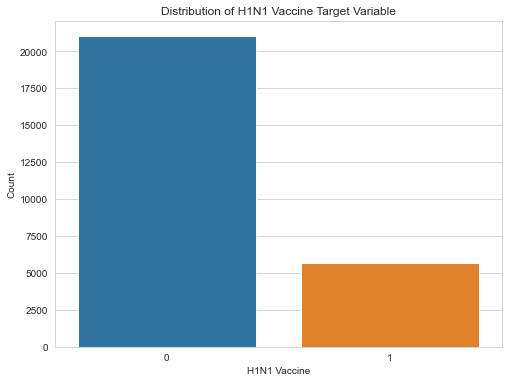

In [3]:
# Setting for plots
sns.set_style("whitegrid")

# Plot distribution of the h1n1_vaccine target variable
plt.figure(figsize=(8, 6))
sns.countplot(x=train_labels['h1n1_vaccine'])
plt.title('Distribution of H1N1 Vaccine Target Variable')
plt.xlabel('H1N1 Vaccine')
plt.ylabel('Count')
plt.show()

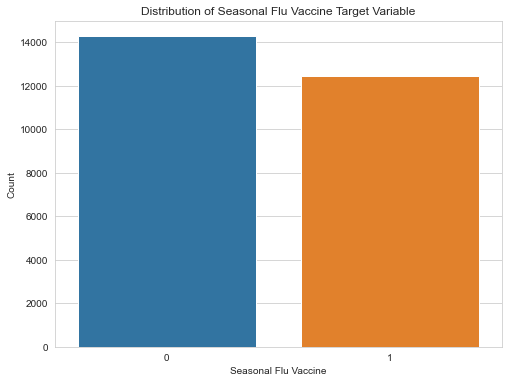

In [4]:
# Plot distribution of the seasonal_vaccine target variable
plt.figure(figsize=(8, 6))
sns.countplot(x=train_labels['seasonal_vaccine'])
plt.title('Distribution of Seasonal Flu Vaccine Target Variable')
plt.xlabel('Seasonal Flu Vaccine')
plt.ylabel('Count')
plt.show()

In [5]:
#get correlations of each features in dataset
corrmat = merged_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(merged_data[top_corr_features].corr(),annot=True,cmap="Blues")

NameError: name 'merged_data' is not defined

In [ ]:
# Create a contingency table
contingency_table = pd.crosstab(train_labels['h1n1_vaccine'], train_labels['seasonal_vaccine'])

# Plot the contingency table as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')
plt.title('Contingency Table of H1N1 Vaccine vs Seasonal Vaccine')
plt.xlabel('Seasonal Vaccine')
plt.ylabel('H1N1 Vaccine')
plt.show()

In [ ]:
# Perform Chi-squared test for independence
from scipy.stats import chi2_contingency
chi2, p, _, _ = chi2_contingency(contingency_table)

chi2, p

In [ ]:
# Merge the target columns with the feature dataset
merged_data = train_features.merge(train_labels, on="respondent_id")

# Compute the correlation matrix
correlation_matrix = merged_data.corr()

# Extract correlations with the two target variables
h1n1_correlations = correlation_matrix["h1n1_vaccine"].sort_values(ascending=False)
seasonal_correlations = correlation_matrix["seasonal_vaccine"].sort_values(ascending=False)

# Plot correlations
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 16))

# H1N1 Vaccine Correlations
sns.barplot(x=h1n1_correlations[1:], y=h1n1_correlations.index[1:], ax=ax1, palette="coolwarm")
ax1.set_title("Correlation of Features with H1N1 Vaccine")
ax1.set_xlabel("Correlation Coefficient")

# Seasonal Vaccine Correlations
sns.barplot(x=seasonal_correlations[1:], y=seasonal_correlations.index[1:], ax=ax2, palette="coolwarm")
ax2.set_title("Correlation of Features with Seasonal Vaccine")
ax2.set_xlabel("Correlation Coefficient")

plt.tight_layout()
plt.show()


In [ ]:
# Select a subset of key features and the h1n1_vaccine target for pairplot
selected_features = ['h1n1_concern', 'h1n1_knowledge', 'doctor_recc_h1n1', 'opinion_h1n1_vacc_effective', 'h1n1_vaccine']
subset_data = merged_data[selected_features]

# Plot pairplot
sns.pairplot(subset_data, hue='h1n1_vaccine', plot_kws={'alpha':0.5}, palette="husl")
plt.suptitle('Multivariate Analysis of Key Features vs H1N1 Vaccine', y=1.02)
plt.show()


 pairplot provides a visual analysis of the pairwise relationships between selected features and the H1N1 vaccination decision:

H1N1 Concern vs. H1N1 Knowledge: There doesn't appear to be a strong linear relationship between an individual's level of concern about H1N1 and their knowledge about H1N1. However, the distribution suggests that those with a higher concern often have some level of knowledge.

Doctor Recommendation vs. Opinion on Vaccine Effectiveness: It's evident that when doctors recommend the vaccine (doctor_recc_h1n1), individuals tend to have a higher opinion of the vaccine's effectiveness (opinion_h1n1_vacc_effective).

H1N1 Vaccine Distribution: The hue of the points (representing whether an individual received the H1N1 vaccine) shows that people with higher opinions about vaccine effectiveness, higher H1N1 concern, and doctor recommendations are more likely to get vaccinated.

In [ ]:
# Select a subset of key features and the seasonal_vaccine target for pairplot
selected_features_seasonal = ['h1n1_concern', 'h1n1_knowledge', 'doctor_recc_seasonal', 'opinion_seas_vacc_effective', 'seasonal_vaccine']
subset_data_seasonal = merged_data[selected_features_seasonal]

# Plot pairplot
sns.pairplot(subset_data_seasonal, hue='seasonal_vaccine', plot_kws={'alpha':0.5}, palette="husl")
plt.suptitle('Multivariate Analysis of Key Features vs Seasonal Vaccine', y=1.02)
plt.show()


In [ ]:
# Function to plot stacked bar chart for demographic feature vs vaccine
def plot_stacked_bar(feature, vaccine, title):
    # Create crosstab for the feature and vaccine
    ct = pd.crosstab(merged_data[feature], merged_data[vaccine], normalize='index') * 100
    ct.plot(kind='bar', stacked=True, color=['#d9534f', '#5bc0de'], figsize=(10, 6))
    plt.title(title)
    plt.ylabel('Percentage (%)')
    plt.xticks(rotation=45)
    plt.legend(title=vaccine, labels=['Not Vaccinated', 'Vaccinated'])
    plt.show()

# Plot for age_group vs h1n1_vaccine
plot_stacked_bar('age_group', 'h1n1_vaccine', 'Distribution of Age Group for H1N1 Vaccine')

# Plot for age_group vs seasonal_vaccine
plot_stacked_bar('age_group', 'seasonal_vaccine', 'Distribution of Age Group for Seasonal Vaccine')


In [ ]:
# Plotting the distribution for other demographic features

# For education vs h1n1_vaccine and seasonal_vaccine
plot_stacked_bar('education', 'h1n1_vaccine', 'Distribution of Education for H1N1 Vaccine')
plot_stacked_bar('education', 'seasonal_vaccine', 'Distribution of Education for Seasonal Vaccine')

# For income_poverty vs h1n1_vaccine and seasonal_vaccine
plot_stacked_bar('income_poverty', 'h1n1_vaccine', 'Distribution of Income Poverty for H1N1 Vaccine')
plot_stacked_bar('income_poverty', 'seasonal_vaccine', 'Distribution of Income Poverty for Seasonal Vaccine')

# For race vs h1n1_vaccine and seasonal_vaccine
plot_stacked_bar('race', 'h1n1_vaccine', 'Distribution of Race for H1N1 Vaccine')
plot_stacked_bar('race', 'seasonal_vaccine', 'Distribution of Race for Seasonal Vaccine')

# For sex vs h1n1_vaccine and seasonal_vaccine
plot_stacked_bar('sex', 'h1n1_vaccine', 'Distribution of Sex for H1N1 Vaccine')
plot_stacked_bar('sex', 'seasonal_vaccine', 'Distribution of Sex for Seasonal Vaccine')


In [ ]:



# Selecting the subset of features for the pairplot
selected_features_pairplot = ['h1n1_concern', 'h1n1_knowledge', 'opinion_h1n1_vacc_effective', 
                              'opinion_h1n1_risk', 'doctor_recc_h1n1', 'h1n1_vaccine']
subset_data_pairplot = merged_data[selected_features_pairplot]

# Plotting the pairplot
sns.pairplot(subset_data_pairplot, hue='h1n1_vaccine', plot_kws={'alpha':0.5}, palette="husl", corner=True)
plt.suptitle('Pairwise Relationships of Selected Features with H1N1 Vaccine', y=1.02)
plt.show()


the pairplot provides a visual analysis of the pairwise relationships between selected features and the H1N1 vaccination decision:

H1N1 Concern vs. H1N1 Knowledge: The scatter plot suggests that as the level of concern about H1N1 increases, the level of knowledge about H1N1 also tends to increase.
Opinions on H1N1 Vaccine Effectiveness and Risk: It's evident that individuals who perceive the vaccine as effective (higher scores on opinion_h1n1_vacc_effective) also tend to perceive a higher risk from H1N1 (opinion_h1n1_risk).
Doctor Recommendations: The scatter plots show that individuals who received a recommendation from a doctor (doctor_recc_h1n1) generally have a higher opinion of the vaccine's effectiveness and perceive a higher risk from H1N1.
The histograms on the diagonal represent the univariate distributions of the respective features. For example, most respondents have a high level of concern about H1N1 (h1n1_concern), and many believe that the vaccine is quite effective (opinion_h1n1_vacc_effective).

In [ ]:
# Adjusting the selected features to focus on the seasonal flu vaccine
selected_features_pairplot_seasonal = ['h1n1_concern', 'h1n1_knowledge', 'opinion_seas_vacc_effective', 
                                       'opinion_seas_risk', 'doctor_recc_seasonal', 'seasonal_vaccine']
subset_data_pairplot_seasonal = merged_data[selected_features_pairplot_seasonal]

# Plotting the pairplot for the selected features with respect to the seasonal flu
sns.pairplot(subset_data_pairplot_seasonal, hue='seasonal_vaccine', plot_kws={'alpha':0.5}, palette="husl", corner=True)
plt.suptitle('Pairwise Relationships of Selected Features with Seasonal Vaccine', y=1.02)
plt.show()


The pairplot visualizes the pairwise relationships between selected features and the decision to receive the seasonal flu vaccine:

H1N1 Concern vs. H1N1 Knowledge: Just like with the H1N1 vaccine, there's a general trend where a higher level of concern often aligns with more knowledge.
Opinions on Seasonal Vaccine Effectiveness and Risk: Individuals who perceive the seasonal vaccine as effective (higher scores on opinion_seas_vacc_effective) also tend to perceive a higher risk from the seasonal flu (opinion_seas_risk).
Doctor Recommendations: There's a clear distinction in the doctor_recc_seasonal scatter plots. Those who received a recommendation from a doctor generally have a higher opinion of the vaccine's effectiveness and perceive a higher risk from the seasonal flu.
The histograms on the diagonal represent the univariate distributions of the respective features. Most respondents believe that the seasonal flu vaccine is quite effective (opinion_seas_vacc_effective).

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Identify numerical and categorical columns
numerical_cols = train_features.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = train_features.select_dtypes(include=['object']).columns.tolist()

# Remove columns with a high percentage of missing values (> 40%)
columns_to_drop = missing_data[missing_data['Percentage'] > 40].index.tolist()
for col in columns_to_drop:
    if col in numerical_cols:
        numerical_cols.remove(col)
    if col in categorical_cols:
        categorical_cols.remove(col)

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ], 
    remainder='drop'  # Drop columns with high missing values
)

# Preprocess the training features
train_features_preprocessed = preprocessor.fit_transform(train_features)

# Shape of the preprocessed data
train_features_preprocessed.shape


In [ ]:
import numpy as np
from sklearn.neighbors import NearestNeighbors

def manual_SMOTE(data, target, k=5, sampling_rate=1):
    """
    Manual implementation of SMOTE.
    
    Parameters:
    - data: Features (numpy array)
    - target: Target variable (numpy array)
    - k: Number of nearest neighbors
    - sampling_rate: Percentage of SMOTE samples to generate
    
    Returns:
    - New features and target arrays augmented with SMOTE samples
    """
    
    # Identify minority class samples
    minority_samples = data[target == 1]
    
    # Calculate the number of new synthetic samples to generate
    n_samples = int(len(minority_samples) * sampling_rate)
    
    # Find k nearest neighbors for each minority sample
    nbrs = NearestNeighbors(n_neighbors=k).fit(minority_samples)
    neighbours = nbrs.kneighbors(minority_samples, return_distance=False)
    
    # Generate synthetic samples
    synthetic_samples = np.zeros((n_samples, data.shape[1]))
    for i in range(n_samples):
        # Randomly choose a minority sample
        idx = np.random.randint(0, len(minority_samples))
        chosen_sample = minority_samples[idx]
        
        # Choose one of its k neighbors
        neighbor = minority_samples[neighbours[idx][np.random.choice(k)]]
        
        # Randomly choose a factor in [0, 1]
        alpha = np.random.random()
        
        # Generate synthetic sample
        synthetic_samples[i] = chosen_sample + alpha * (neighbor - chosen_sample)
    
    # Concatenate the original samples with the synthetic ones
    new_data = np.vstack((data, synthetic_samples))
    new_target = np.hstack((target, np.ones(n_samples)))
    
    return new_data, new_target

# Apply SMOTE to the training data for h1n1_vaccine
X_train_h1n1_smote, y_train_h1n1_smote = manual_SMOTE(np.array(X_train_h1n1), np.array(y_train_h1n1))

# Check the distribution of the target after SMOTE
target_distribution_after_smote = pd.Series(y_train_h1n1_smote).value_counts()

target_distribution_after_smote


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
import warnings
from sklearn.exceptions import DataConversionWarning

warnings.filterwarnings(action='ignore', category=DataConversionWarning)
# Initialize 5-fold stratified cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Placeholders for average accuracies
avg_acc_rf = 0
avg_acc_logreg = 0

# Cross-validation loop
for train_index, test_index in kf.split(X_train_h1n1, y_train_h1n1):
    # Splitting data into train and validation sets for this fold
    X_train_fold, X_test_fold = X_train_h1n1.iloc[train_index], X_train_h1n1.iloc[test_index]
    y_train_fold, y_test_fold = y_train_h1n1.iloc[train_index], y_train_h1n1.iloc[test_index]
    
    # Apply SMOTE to the training data for this fold
    X_train_fold_smote, y_train_fold_smote = (np.array(X_train_fold), np.array(y_train_fold))
    
    # Train and validate Random Forest model
    rf = RandomForestClassifier(random_state=42, n_estimators=100)
    rf.fit(X_train_fold_smote, y_train_fold_smote)
    y_pred_fold_rf = rf.predict(X_test_fold)
    avg_acc_rf += accuracy_score(y_test_fold, y_pred_fold_rf)
    
    # Train and validate Logistic Regression model
    logreg = LogisticRegression(max_iter=1000, random_state=42)
    logreg.fit(X_train_fold_smote, y_train_fold_smote)
    y_pred_fold_logreg = logreg.predict(X_test_fold)
    avg_acc_logreg += accuracy_score(y_test_fold, y_pred_fold_logreg)

# Compute average accuracies
avg_acc_rf /= 5
avg_acc_logreg /= 5

avg_acc_rf, avg_acc_logreg
